<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_final_amostra_03_nov_22_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
#!pip install mahotas

In [3]:
'''
import mahotas.features.texture as mht
import mahotas.features
'''

'\nimport mahotas.features.texture as mht\nimport mahotas.features\n'

In [4]:
'''
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas
'''

'\n!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github\n%cd marquesgabi_fev_2020\nimport Go2BlackWhite\nimport Go2Mahotas\n'

In [5]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 464 (delta 102), reused 4 (delta 3), pack-reused 250
Receiving objects: 100% (464/464), 166.12 MiB | 29.08 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/Doutorado


In [7]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [8]:
Size=1200 # tamanho da foto
# ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 167 (delta 66), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (167/167), 211.71 MiB | 22.15 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Checking out files: 100% (48/48), done.
/content/Doutorado/MarquesGabi_Routines


In [10]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [11]:
df=Segmenta(img)
Img_Size = 28

In [12]:
print(df)

    Width           0           1  ...         781         782         783
0     102  215.197632  212.785492  ...  155.264145  154.048843  160.749329
1     150  174.930847  174.756638  ...   98.711288   98.479462  118.279289
2     131  172.534821  168.727341  ...  170.653381  179.598862  186.003937
3     146  101.802582  106.869583  ...   60.719646   65.152939   70.389191
4     193   86.418404   98.353859  ...  213.624954  227.768829  217.027878
5     135  136.020020  142.663971  ...  188.428085  201.377228  206.629990
6     113  230.574677  238.703247  ...   79.136269   80.043854   79.697388
7     116  102.853745  106.343636  ...  120.500587  123.022591  153.556488
8     146   89.538368   92.093079  ...  153.708771  148.396896  140.676117
9     104  161.587296  161.399429  ...  186.337296  184.593201  182.754456
10    116   16.825207   34.185490  ...    1.000000    1.000000    1.000000
11    117  130.671860  130.837524  ...  170.094666  175.737381  179.494995
12    112  164.687500  14

In [13]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 167 (delta 66), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (167/167), 211.71 MiB | 21.33 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Checking out files: 100% (48/48), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [14]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [15]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [16]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 152ms/step - loss: 0.6241 - accuracy: 0.6997 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 126ms/step - loss: 0.3616 - accuracy: 0.8426 - val_loss: 0.6934 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 1s 124ms/step - loss: 0.1834 - accuracy: 0.9475 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 4/200
11/11 [==============================] - 1s 125ms/step - loss: 0.1792 - accuracy: 0.9096 - val_loss: 0.6930 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 1s 123ms/step - loss: 0.0897 - accuracy: 0.9738 - val_loss: 0.6929 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 1s 125ms/step - loss: 0.0648 - accuracy: 0.9825 - val_loss: 0.6926 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 124ms/step - loss: 0.0337 - accuracy: 0.9883 - val_loss: 0.6926 - val_accuracy: 0.5102

In [18]:
Y_test = yback(Y_test)

In [19]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        71   1
1         1  74


In [20]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.99      0.99      0.99        75

    accuracy                           0.99       147
   macro avg       0.99      0.99      0.99       147
weighted avg       0.99      0.99      0.99       147



In [21]:
'''
#X =np.array(df.copy())/255.0 
X =np.array(df.copy())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  
prediction = model.predict(X_test)  
y =np.copy(y_test)
data = {'y_true': y_test,'y_predict': prediction}  
# este dado esta no formato de dicionario
df = pd.DataFrame(data, columns=['y_true','y_predict'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)
y_true = df['y_true']
y_pred = df['y_predict']  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
print(METRICS)
#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh',                       solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  prediction = model.predict(X_test)  y =np.copy(y_test)data = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionariodf = pd.DataFrame(data, columns=['y_true','y_predict'])confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])print(confusion_matrix)y_true = df['y_true']y_pred = df['y_predict']
'''

"\n#X =np.array(df.copy())/255.0 \nX =np.array(df.copy())\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)\nmodel = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  \nprediction = model.predict(X_test)  \ny =np.copy(y_test)\ndata = {'y_true': y_test,'y_predict': prediction}  \n# este dado esta no formato de dicionario\ndf = pd.DataFrame(data, columns=['y_true','y_predict'])\nconfusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])\nprint(confusion_matrix)\ny_true = df['y_true']\ny_pred = df['y_predict']  \nMETRICS=sklearn.metrics.classification_report(y_true, y_pred)\nprint(METRICS)\n#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='ta

In [22]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [23]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction= np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
1   178.0   99.614960   93.996727  ...  218.879196  216.848007  207.590347
2   180.0   41.040497   32.472099  ...  173.566925  153.957520  159.266174
3   144.0  189.334106  175.109589  ...  129.371918   92.259262   81.466820
4   113.0   55.608746   50.869919  ...  125.337143  119.127731  135.359222
6   147.0    0.226757    0.702948  ...  135.902496  130.657608  126.639465
9   187.0  164.918869  161.003799  ...  154.471115  164.435379  165.120911
10  172.0  128.931870  129.601410  ...  213.281784  219.322891  222.270416
11  178.0    0.238228    1.451711  ...  186.795120  187.726181  183.753204
12  181.0  146.996597  146.538849  ...  143.309830  166.768539  160.995758
13  173.0  211.757462  211.826096  ...    1.349895    0.943767    0.494905
15  117.0  138.449127  144.195786  ...  243.661041  227.910660  198.758331
16  124.0  132.386047  130.844940  ...  243.952118  247.009354  243.445358
17  145.0  189.044891  23

In [24]:
Width=np.array(Width_new)

In [25]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 741, done.
remote: Counting objects: 100% (502/502), done.
remote: Compressing objects: 100% (500/500), done.
remote: Total 741 (delta 319), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (741/741), 5.89 MiB | 11.04 MiB/s, done.
Resolving deltas: 100% (456/456), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [26]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 5.80 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [27]:
PSD_new.shape

(95, 2)

In [28]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [29]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
1,178.0,99.614960,93.996727,130.426849,158.160736,159.325363,141.862396,132.532272,133.724792,137.618988,153.171082,155.668488,122.435051,79.575188,84.258179,101.909996,113.836517,114.847244,122.582123,119.721886,124.789688,129.324478,130.393021,124.445786,116.302612,103.795364,143.769867,147.586548,146.585159,89.916435,85.408173,92.625061,134.579346,152.607254,143.143799,132.356018,134.462585,136.806229,147.740692,136.072723,...,217.075745,239.894592,253.040924,253.315887,253.734909,251.217804,241.313721,206.714569,200.205292,196.401001,194.510941,194.822784,248.914047,253.493546,253.901321,254.010651,254.899536,250.349579,190.613678,127.426468,118.342140,113.775795,120.666206,120.468002,114.313744,121.397690,179.415497,215.830353,226.960114,251.448456,254.189270,253.363373,253.003693,230.450714,194.432556,214.073990,213.077667,218.879196,216.848007,207.590347
2,180.0,41.040497,32.472099,55.886917,69.962967,68.264206,65.537773,60.066181,50.174324,38.357037,32.342720,51.010868,78.011864,89.095314,91.962479,92.213333,92.115562,87.661736,79.932846,73.065689,77.139267,75.639511,73.310623,86.599014,106.709145,138.413345,149.496811,148.000992,149.050385,86.892342,87.596550,100.619263,112.051369,112.192108,97.122971,58.486919,40.030621,52.455811,95.693329,123.073090,...,158.461746,153.356049,161.709641,171.316559,171.984711,160.334335,153.799530,166.001968,168.138275,163.808411,143.995560,151.581253,158.066193,157.717056,179.814331,189.044464,181.090378,163.142242,152.929413,153.415802,155.186188,172.602966,189.062241,176.136307,169.348648,173.449387,175.857803,172.311615,162.752609,156.710617,158.786179,170.223724,168.900742,152.739761,143.064209,162.243469,174.830124,173.566925,153.957520,159.266174
3,144.0,189.334106,175.109589,145.048615,102.171295,105.125786,106.908958,105.022369,99.218376,98.385803,121.030869,139.206787,150.442139,145.221466,141.430557,143.198303,156.185211,161.245377,167.760803,177.029327,177.816360,194.298630,206.317917,214.554016,227.742294,161.412033,71.929787,83.848770,81.543213,183.054794,162.363434,128.533966,98.596458,104.067902,105.603394,99.958336,114.904335,173.118057,175.777786,174.371918,...,84.233803,72.059418,79.066360,111.785492,125.613426,130.318680,137.138123,145.575623,145.729935,134.672073,129.236115,128.368057,123.806335,123.173607,129.885040,130.467590,129.141983,128.220673,123.057106,124.566360,106.110336,111.278549,113.724548,122.501541,162.899689,174.790115,174.614960,169.456024,163.780090,144.540115,134.204483,143.908188,155.760040,163.098007,163.407425,151.565582,141.388885,129.371918,92.259262,81.466820
4,113.0,55.608746,50.869919,45.180904,38.793560,115.065468,153.107758,165.894897,171.432068,174.725647,168.803360,160.592209,154.942749,152.810165,151.845001,147.584686,137.870224,110.525887,80.399788,67.402069,67.330956,61.584774,61.885502,71.630669,71.947685,75.757454,93.839378,107.489548,110.920822,90.849396,84.273636,73.269402,61.674133,90.864822,140.749878,160.668335,167.092346,170.097275,170.064835,165.942200,...,96.855515,151.440369,178.466125,179.616241,166.098907,143.913147,144.581406,145.205109,139.256165,129.981827,131.227341,140.202194,57.134544,65.304955,81.706009,89.917305,87.301979,91.094131,92.335098,87.350067,93.234161,98.791992,107.959976,118.019341,120.043465,118.034531,120.738739,113.991158,88.666611,159.286865,182.493225,181.356567,161.535370,129.838440,139.741089,143.810333,139.704742,125.337143,119.127731,135.359222
6,147.0,0.226757,0.702948,1.750567,1.083900,0.045351,0.902494,1.807256,0.854875,0.083900,1.131519,1.702948,0.655329,0.274376,1.244898,0.834467,6.716554,41.768711,69.065765,134.517014,147.519287,137.911591,123.585037,119.666672,115.526085,110.090706,106.897964,102.192749,95.793

In [30]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [31]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [32]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


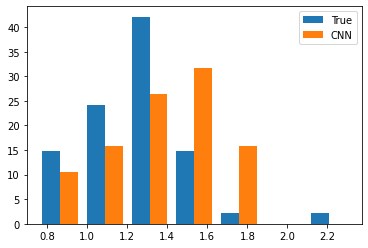

In [33]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [34]:
B = A[0][0]

In [35]:
Novo = []
k = 0
soma = 0
for i in B:
  if(k<4):
    Novo.append(i)
  else:
    soma = soma + i
  k = k + 1
Novo.append(soma)
print(Novo)

[14.736842105263156, 24.2105263157895, 42.1052631578948, 14.736842105263179, 4.21052631578948]


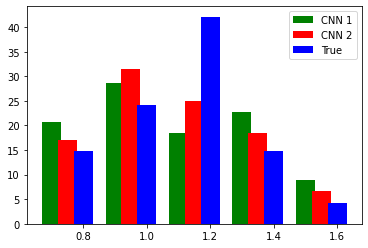

In [36]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = Novo
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])